In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data1.csv', sep=',')

In [4]:
df.head(100)

,pt,gender,mhx,age,mrn,resident,orthodontic_problem,dhc,ac_need,ca,age_group
0,1,M,Not Relevant,10,2225230,tamathor,"deepbite, openbite on the lateral, crowding , ...",3,6,Moderate,between 10 - 20
1,2,F,Not Relevant,13,2034777,tamathor,"displacement , rotation, crowding, carious mol...",2,4,Little,between 10 - 20
2,3,M,Diabetes,50,437754,tamathor,"openbite(anterior and L lateral),class III, di...",4,7,Moderate,above 30
3,4,F,Not Relevant,18,498115,tamathor,"crowding, reverse overjet,openbite , left inla...",4,8,Great,between 10 - 20
4,5,M,Not Relevant,8,462544,tamathor,"bilateral crossbite, minor rotation of teeth, ...",3,5,Moderate,under 10
5,6,M,CLP only,13,2082885,tamathor,cleft lip and palte,5,10,Great,between 10 - 20
6,7,M,Not Relevant,13,2086589,Nora,"crossbite, displacement, crowding",4,8,Great,between 10 - 20
7,8,M,controlled asthma,31,2519468,Nora,"left unilateral cross-bite, medline shifting m...",4,4,Little,above 30
8,9,M,Not Relevant,13,769129,Nora,"increase overjet, displacement of teeth , (Cla...",4,7,Moderate,between 10 - 20
9,10,F,"Systemic Lupus Erythematosus, non-specific int...",29,2563295,Nora,"tooth #14 in crossbite, minor rotation, missin...",2,4,Little,between 20-30


In [5]:
df.describe()

,pt,age,mrn,dhc,ac_need
count,50.00000,50.00000,5.000000e+01,50.000000,50.000000
mean,25.50000,19.10000,1.324519e+06,3.640000,6.320000
std,14.57738,8.41585,8.820354e+05,0.942424,2.132738
min,1.00000,7.00000,2.525140e+05,1.000000,1.000000
25%,13.25000,13.00000,5.455715e+05,3.000000,5.000000
50%,25.50000,17.00000,6.789275e+05,4.000000,6.000000
75%,37.75000,23.00000,2.119307e+06,4.000000,8.000000
max,50.00000,50.00000,2.633936e+06,5.000000,10.000000


In [6]:
df.columns = [x.lower() for x in df.columns]

In [7]:
df['catig'] = if df.query('dhc < '):
    
    
else if df.query('< dhc < '):
    
    
else:
    
    
    

SyntaxError: invalid syntax (<ipython-input-7-455573318074>, line 1)

In [8]:
df['ca'] = np.where(df['ac_need'] <= 4, 'No/Slight Need', np.where((df['ac_need'] >= 5) & (df['ac_need'] <= 7), 'Moderate Need', np.where((df['ac_need'] >= 8) & (df['dhc'] <= 10) , 'Need TX','no')))

In [9]:
df['ka'] = np.where(df['dhc'] <= 2, 'No/Slight Need', np.where(df['dhc'] == 3, 'Moderate Need', np.where((df['dhc'] >= 4) & (df['dhc'] <= 5) , 'Need TX', 'no')))

In [10]:
df['age_group'] = np.where(df['age'] < 10, 'under 10', np.where((df['age'] >= 10) & (df['age'] < 20), 'between 10 - 20', np.where((df['age'] >= 20) & (df['age'] <= 30), 'between 20-30', np.where(df['age'] > 30, 'above 30', 'no'))))

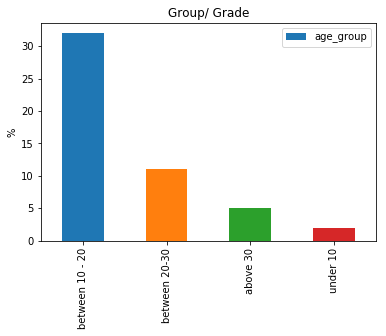

In [11]:
df.age_group.value_counts().plot(kind='bar')
plt.ylabel('%')
plt.title('Group/ Grade')
plt.legend()

In [12]:
ca_sort = ['']

In [13]:
ca_sort = ['No/Slight Need', 'Moderate Need', 'Need TX']

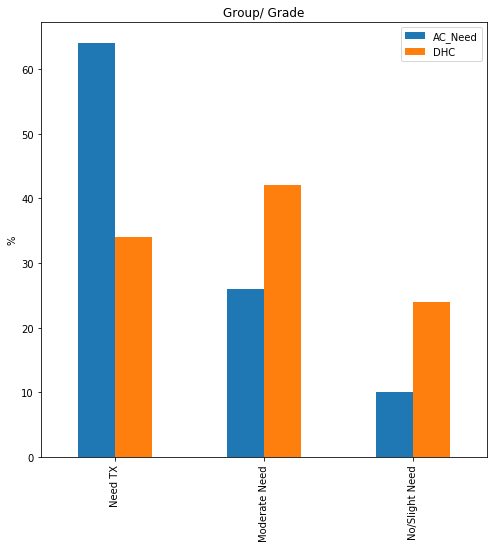

In [18]:
c = df.ka.value_counts(dropna=False, normalize=True) *100
p = df.ca.value_counts(dropna=False, normalize=True) *100
pd.concat([c,p], axis=1, keys=['AC_Need','DHC'], sort= False).plot(kind= 'bar', figsize= (8,8))
plt.ylabel('%')
plt.title('Group/ Grade')
plt.legend()

In [19]:
p = df.ca.value_counts(dropna=False, normalize=True) *100
pd.concat([p], axis=1, keys=['%'])

,%
Moderate Need,42.0
Need TX,34.0
No/Slight Need,24.0


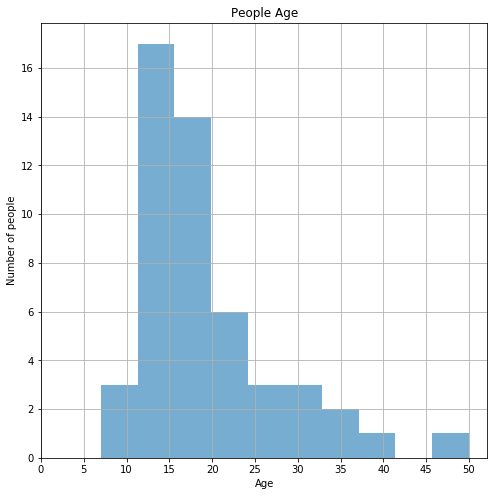

In [20]:
df.age.hist(figsize= (8,8),alpha= 0.6)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.ylabel('Number of people')
plt.xlabel('Age')
plt.title('People Age')
plt.legend()

In [81]:
df.plot(kind='pie', y='mhx')

TypeError: '<' not supported between instances of 'str' and 'int'

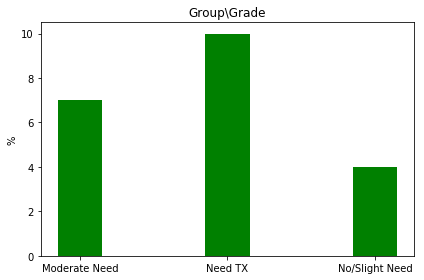

In [13]:

plt.bar(df['ca'],df['dhc'], width=0.3, color='b', align='center')
plt.bar(df['ca'],df['ac_need'], width=0.3, color='g', align='center')

plt.ylabel('')
plt.ylabel('%')
plt.title('Group\Grade')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(*args, **kwargs)
    Make a bar plot.
    
    Call signatures::
    
       bar(x, height, *, align='center', **kwargs)
       bar(x, height, width, *, align='center', **kwargs)
       bar(x, height, width, bottom, *, align='center', **kwargs)
    
    Make a bar plot with rectangles bounded by
    
    .. math::
    
       (x - width/2, x + width/2, bottom, bottom + height)
    
    (left, right, bottom and top edges) by default.  *x*,
    *height*, *width*, and *bottom* can be either scalars or
    sequences.
    
    The *align* and *orientation* kwargs control the interpretation of *x*
    and *bottom*
    
    The *align* keyword-only argument controls if *x* is interpreted
    as the center or the left edge of the rectangle.
    
    Parameters
    ----------
    x : sequence of scalars
        the x coordinates of the bars.
    
        *align* controls if *x* is the bar center (default) or
        left edge.
    
    heig

In [ ]:
df.to_csv('data1', index= False)